In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
def saddle(x, y):
    return x**2 - y**2

def xy(x, y):
    return x*y

In [55]:
Nx = 30
Ny = 30
x = np.linspace(-1, 1, Nx)
y = np.linspace(-1, 1, Ny)

X, Y = np.array(np.meshgrid(x, y))
X = X.ravel()
Y = Y.ravel()

Z = saddle(X, Y)



<IPython.core.display.Javascript object>


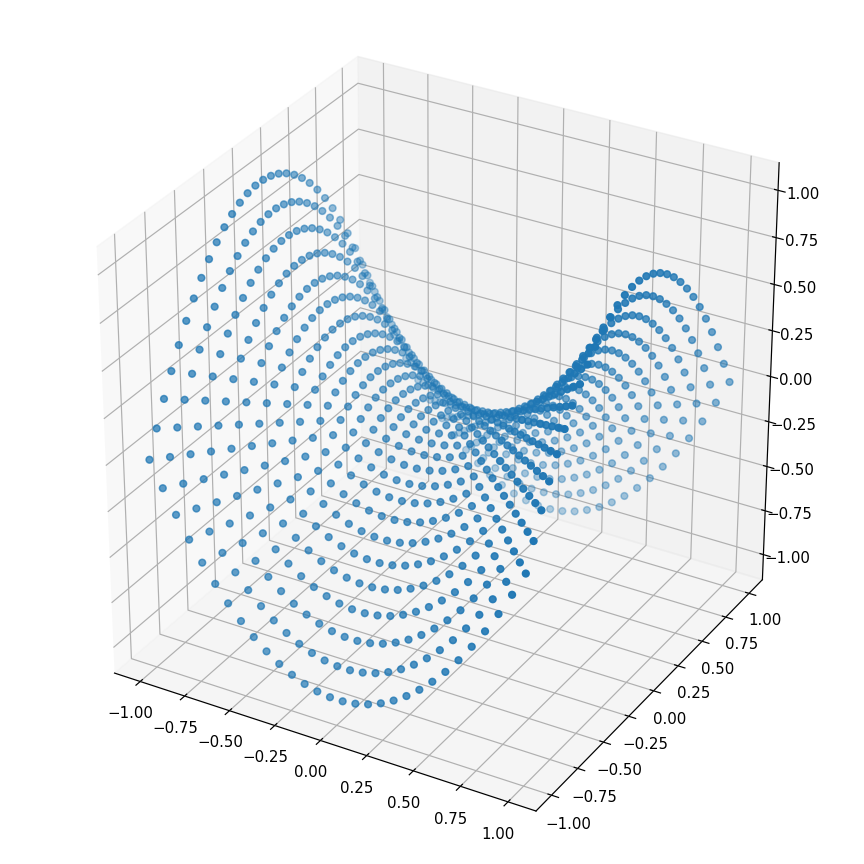

In [56]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter3D(X, Y, Z)


In [57]:
def F(x, y):
    return xy(x, y)

In [58]:
def grad(x, y):
    dx = 2.0/30
    dy = 2.0/30
    print dx
    return np.array([(F(x, y) - F(x-dx, y))/dx, (F(x, y) - F(x, y-dy))/dy])

0.0666666666667
(900, 2)
900


<IPython.core.display.Javascript object>


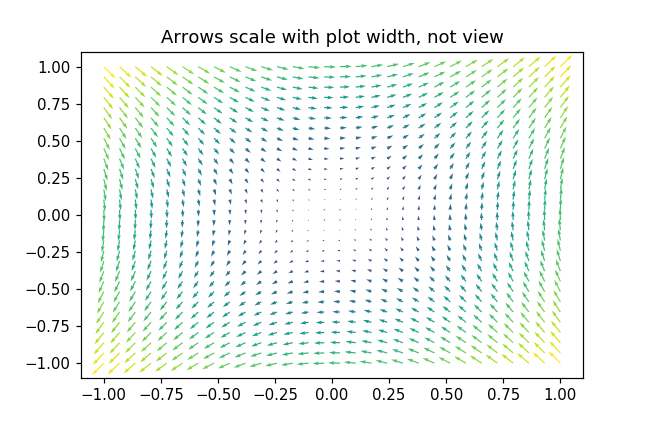

In [59]:
Gradient = grad(X, Y).transpose()
print Gradient.shape
print len(X)

fig1, ax1 = plt.subplots()
ax1.set_title('Arrows scale with plot width, not view')

M = np.hypot(Gradient[:, 0],  Gradient[:, 1])
Q = ax1.quiver(X, Y, Gradient[:, 0],  Gradient[:, 1], M,  units='width')
# qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

In [68]:
a = np.random.rand(4, 2)

print a 
A = a.reshape(2,2,2)
print A
B = np.transpose(A, (2, 1, 0))
print B[0,:,:]

[[0.12250633 0.90161147]
 [0.17429122 0.13715553]
 [0.13217531 0.08295956]
 [0.16689424 0.06547318]]
[[[0.12250633 0.90161147]
  [0.17429122 0.13715553]]

 [[0.13217531 0.08295956]
  [0.16689424 0.06547318]]]
[[0.12250633 0.13217531]
 [0.17429122 0.16689424]]


In [70]:
G = Gradient.reshape(Nx, Ny, 2)
G = np.transpose(G, (2, 1, 0))
print G.shape
def div(G):
    dx = 2.0/30
    dy = 2.0/30
    _, Dx, Dy = G.shape
    
    Div = np.zeros((Dx, Dy))
    for i in range(1, Dx):
        for j in range(1, Dy):
            Div[i, j] = (G[0, i, j] - G[0, i-1, j])/dx + (G[1, i, j] - G[1, i, j-1])/dy
        
    return Div

print div(G) 

(2, 30, 30)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.99600361e-14 -4.99600361e-14  2.49800181e-14
  -2.49800181e-14  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.16573418e-14  0.00000000e+00 -1.16573418e-14  0.00000000e+00
   4.16333634e-16 -3.33066907e-15  3.22658567e-15 -3.22658567e-15
   1.66533454e-15 -1.66533454e-15  3.33066907e-15  0.00000000e+00
  -6.66133815e-15  0.00000000e+00  0.00000000e+00  1.16573418e-14
  -1.16573418e-14  2.49800181e-14 -2.49800181e-14  2.49800181e-14
  -2.49800181e-14  0.00000000

In [72]:
def curl(G):
    dx = 2.0/30
    dy = 2.0/30
    _, Dx, Dy = G.shape
    
    Curl = np.zeros((Dx, Dy))
    for i in range(1, Dx):
        for j in range(1, Dy):
            Curl[i, j] = (G[1, i, j] - G[1, i-1, j])/dx - (G[0, i, j] - G[0, i, j-1])/dy
        
    return Curl
print curl(G)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.50910404e-14  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.48689958e-14
   1.15463195e-14  1.15463195e-14 -1.24344979e-14  0.00000000e+00
   4.44089210e-16 -5.99520433e-15  1.99840144e-15  4.44089210e-16
   1.99840144e-15  3.55271368e-15 -5.77315973e-15  6.66133815e-15
  -1.24344979e-14  0.00000000e+00  0.00000000e+00 -1.33226763e-14
   0.00000000e+00  2.48689958e-14  0.00000000e+00 -2.48689958e-14
   2.50910404e-14 -2.48689958e-14]
 [ 0.0

In [82]:
a = np.array([[0, 1, 0], [-1,0,1], [0, -1, 0]])
zero_m = np.zeros((3,3))

first_r = np.concatenate((a, zero_m, zero_m), axis=1)
second_r = np.concatenate((zero_m, a, zero_m), axis=1)
third_r = np.concatenate((zero_m, zero_m, a), axis=1)

A = np.concatenate((first_r, second_r, third_r), axis=0)

print A

A_t = np.transpose(A, (1,0))

from numpy.linalg import inv
from numpy.linalg import det

print det(A_t)

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.]]
0.0
